In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading data

In [2]:
train = pd.read_csv("../data/train.csv")

In [3]:
predict = pd.read_csv("../data/predict.csv")

# Inspecting

In [4]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [5]:
train.shape

(40455, 11)

In [6]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

# Handling categorical data

## Cut

In [8]:
train["cut"].unique()

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [9]:
train["cut"].value_counts()

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

#### Assigning a value to each category
1 = Fair vs. 5 = Ideal

In [10]:
cut = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}

In [11]:
train["cut"] = train["cut"].map(cut)

In [12]:
train["cut"].unique()

array([5, 2, 3, 4, 1])

In [13]:
train["cut"].value_counts()

5    16152
4    10321
3     9040
2     3729
1     1213
Name: cut, dtype: int64

## Color

In [14]:
train["color"].unique()

array(['D', 'I', 'J', 'G', 'E', 'H', 'F'], dtype=object)

In [15]:
train["color"].value_counts()

G    8469
E    7282
F    7199
H    6210
D    5098
I    4091
J    2106
Name: color, dtype: int64

#### Assigning a value to each category
1 = D vs. 7 = J

In [16]:
color = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}

In [17]:
train["color"] = train["color"].map(color)

In [18]:
train["color"].unique()

array([1, 6, 7, 4, 2, 5, 3])

In [19]:
train["color"].value_counts()

4    8469
2    7282
3    7199
5    6210
1    5098
6    4091
7    2106
Name: color, dtype: int64

## Clarity

In [20]:
train["clarity"].unique()

array(['VS2', 'VS1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [21]:
train["clarity"].value_counts()

SI1     9758
VS2     9272
SI2     6895
VS1     6151
VVS2    3799
VVS1    2692
IF      1321
I1       567
Name: clarity, dtype: int64

#### Assigning a value to each category
1 = I1 vs. 8 = IF

In [22]:
clarity = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

In [23]:
train["clarity"] = train["clarity"].map(clarity)

In [24]:
train["clarity"].unique()

array([4, 5, 2, 3, 6, 7, 1, 8])

In [25]:
train["clarity"].value_counts()

3    9758
4    9272
2    6895
5    6151
6    3799
7    2692
8    1321
1     567
Name: clarity, dtype: int64

## Correlation

In [26]:
corr = train.corr()
corr

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.005640,0.003877,-0.004952,-0.004246,0.001335,-0.007937,-0.005818,-0.004904,-0.006368,-0.004630
carat,-0.005640,1.000000,-0.135198,0.294212,-0.350039,0.026242,0.183268,0.975538,0.944843,0.967968,0.921776
cut,0.003877,-0.135198,1.000000,-0.025948,0.190523,-0.219215,-0.434853,-0.126384,-0.121461,-0.152219,-0.052246
color,-0.004952,0.294212,-0.025948,1.000000,0.025203,0.052073,0.027061,0.273145,0.264365,0.276464,0.174569
clarity,-0.004246,-0.350039,0.190523,0.025203,1.000000,-0.068171,-0.164441,-0.369195,-0.352933,-0.370560,-0.144279
depth,0.001335,0.026242,-0.219215,0.052073,-0.068171,1.000000,-0.296991,-0.026495,-0.030529,0.095624,-0.013715
table,-0.007937,0.183268,-0.434853,0.027061,-0.164441,-0.296991,1.000000,0.197330,0.184213,0.156565,0.127199
x,-0.005818,0.975538,-0.126384,0.273145,-0.369195,-0.026495,0.197330,1.000000,0.967690,0.985338,0.884862
y,-0.004904,0.944843,-0.121461,0.264365,-0.352933,-0.030529,0.184213,0.967690,1.000000,0.960890,0.859062
z,-0.006368,0.967968,-0.152219,0.276464,-0.370560,0.095624,0.156565,0.985338,0.960890,1.000000,0.873913


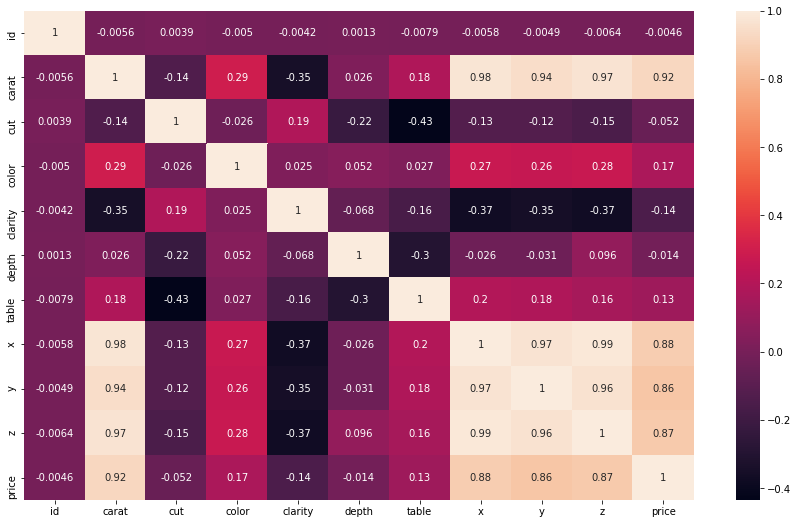

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True);

#### Observation:
From all the diamond characteristics, the ones that are more correlated to the price are:
- caract (0.92)
- x (0.88)
- y (0.86)
- z (0.87)

However, x, y and z are very strongly correlated between each other, which means that overall, they are reproducing very similar information (and we don't want that)

### Dropping x, y, z

In [28]:
train_clean = train.drop(["x", "y", "z"], axis=1)

In [29]:
corr_clean = train_clean.corr()
corr_clean

,id,carat,cut,color,clarity,depth,table,price
id,1.000000,-0.005640,0.003877,-0.004952,-0.004246,0.001335,-0.007937,-0.004630
carat,-0.005640,1.000000,-0.135198,0.294212,-0.350039,0.026242,0.183268,0.921776
cut,0.003877,-0.135198,1.000000,-0.025948,0.190523,-0.219215,-0.434853,-0.052246
color,-0.004952,0.294212,-0.025948,1.000000,0.025203,0.052073,0.027061,0.174569
clarity,-0.004246,-0.350039,0.190523,0.025203,1.000000,-0.068171,-0.164441,-0.144279
depth,0.001335,0.026242,-0.219215,0.052073,-0.068171,1.000000,-0.296991,-0.013715
table,-0.007937,0.183268,-0.434853,0.027061,-0.164441,-0.296991,1.000000,0.127199
price,-0.004630,0.921776,-0.052246,0.174569,-0.144279,-0.013715,0.127199,1.000000


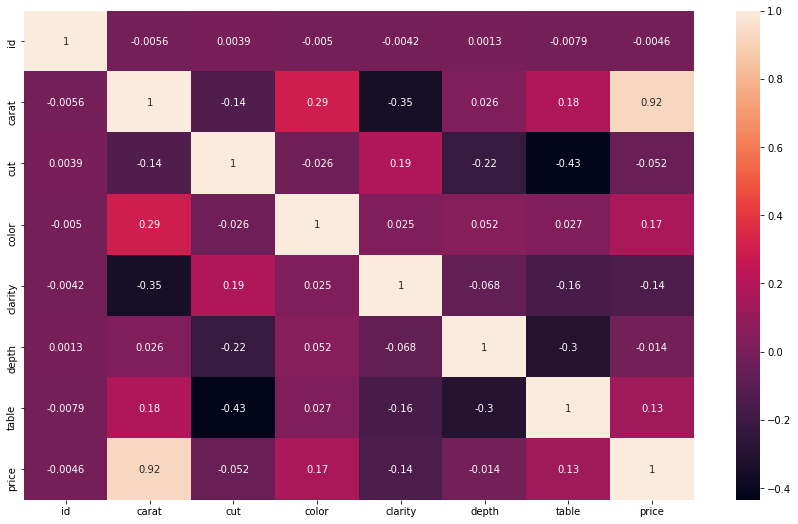

In [30]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_clean, annot=True);

#### Observation:
With x, y and z dropped, **carat** is still the most strongly correlated variable to PRICE. Let's keep that in mind

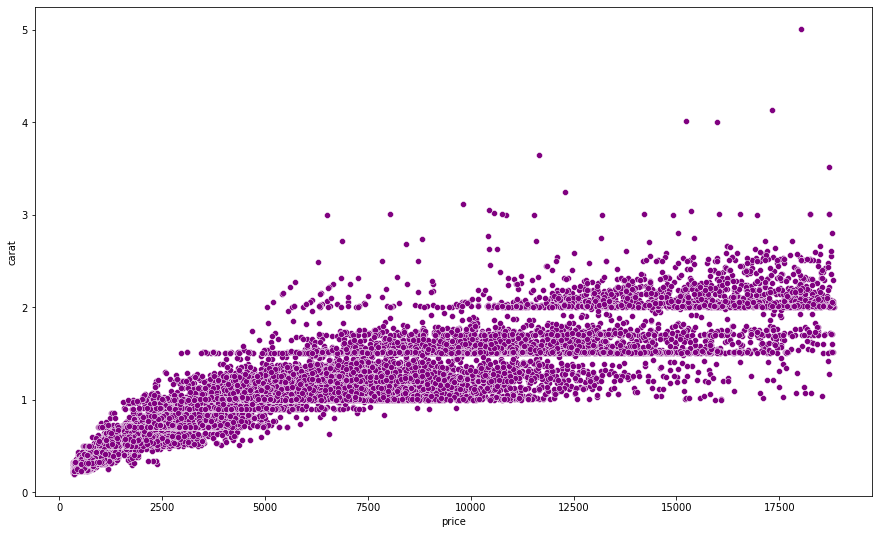

In [31]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=train["price"], y=train["carat"], color="purple");

#### Observation:
The higher the **price**, the higher the **carat**. They both grow simultaneously

#### Once we have:
- explored the dataset,
- checked that there are no null values,
- converted the categorical variables into numerical,
- dropped those columns that provide similar information,
#### we are ready to proceed searchcing for the most optimal model

# Model 1 - Linear Regression

80% train

In [32]:
X = train_clean.drop(columns=["price"])
y = train_clean["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
print(f"Coefficient = {model.coef_}\n")
print(f"Intercept = {model.intercept_}")

Coefficient = [ 7.28090842e-04  8.81571004e+03  1.18372502e+02 -3.22770932e+02
  5.24258530e+02 -4.74848310e+01 -3.00976513e+01]

Intercept = 124.03655822886185


In [35]:
y_pred = model.predict(X_test)

- R2 & RMSE

In [36]:
r2 = r2_score(y_pred, y_test)
print(f"R squared is = {r2}")
rmse = mean_squared_error(y_pred, y_test)**0.5
print(f"Root mean squared error is = {rmse}")

R squared is = 0.8979641340332647
Root mean squared error is = 1200.2644269096816


## To deliver

In [37]:
predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [38]:
predict_clean = predict.drop(["x", "y", "z"], axis=1)

In [39]:
predict_clean["cut"] = predict_clean["cut"].map(cut)
predict_clean["color"] = predict_clean["color"].map(color)
predict_clean["clarity"] = predict_clean["clarity"].map(clarity)

In [40]:
predict_clean.head()

,id,carat,cut,color,clarity,depth,table
0,0,0.45,4,2,3,62.8,58.0
1,1,1.23,5,5,3,61.0,56.0
2,2,0.33,5,6,8,61.8,55.0
3,3,0.51,4,1,4,58.0,60.0
4,4,0.40,4,2,4,62.2,59.0


In [46]:
y_pred_predict_test = model.predict(predict_clean)

In [47]:
y_pred_predict_test

array([ 764.11865259, 6936.10091474, 1292.59411289, ..., 1741.71456099,
       -533.60508171, 5169.18561501])

In [48]:
predict_clean["price"] = y_pred_predict_test
predict_clean.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,0.45,4,2,3,62.8,58.0,764.118653
1,1,1.23,5,5,3,61.0,56.0,6936.100915
2,2,0.33,5,6,8,61.8,55.0,1292.594113
3,3,0.51,4,1,4,58.0,60.0,2307.824788
4,4,0.40,4,2,4,62.2,59.0,845.987841


In [65]:
sub_1 = predict_clean[["id","price"]]
sub_1

,id,price
0,0,764.118653
1,1,6936.100915
2,2,1292.594113
3,3,2307.824788
4,4,845.987841
...,...,...
13480,13480,-1899.290870
13481,13481,4853.543407
13482,13482,1741.714561
13483,13483,-533.605082


In [66]:
sub_1 = sub_1.set_index("id")
sub_1

,price
id,
0,764.118653
1,6936.100915
2,1292.594113
3,2307.824788
4,845.987841
...,...
13480,-1899.290870
13481,4853.543407
13482,1741.714561


In [67]:
sub_1.to_csv("../predictions/1.1")

# Model 2 - Logictic Regression

In [68]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

KeyboardInterrupt: 

# Model 3 - Random Forest Regressor

#### Non-linear model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = RandomForestRegressor(n_estimators=1000, warm_start=False, min_samples_leaf=2, min_samples_split=4)

In [ ]:
regr.fit(x_train, y_train)